In [13]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv("final_df_with_preds.csv", lineterminator="\n")

In [3]:
df.shape

(8597, 18)

In [15]:
def show_items(contains: str, df: pd.DataFrame, by: str = "canditates"):
    display(df[df[by].str.contains(contains, case=False, na=False)])

In [19]:
df = df.filter(
    items=[
        "year",
        "predicted_material",
        "case_doc_subject_rf",
        "case_user_doc_court",
        "acts",
        "canditates",
    ]
)

In [14]:
# df.predicted_material = df.predicted_material.replace("None", np.nan)
# df = df[df.predicted_material.notna()]
# df = df.reset_index(drop=True)

### Топ-10 экстр. материалов за всё время

In [57]:
pd.set_option("max_colwidth", None)
top_grouped = (
    df.groupby("predicted_material", as_index=False)
    .size()
    .sort_values(by="size", ascending=False)
)

top_grouped.iloc[1:20]

,predicted_material,size
185,припомним жуликам и ворам их манифест 2002,200
90,видеозапись грот и 25 17 просыпайтесь,133
376,аудиофайлы с названиями банда москвы виват россии mp 3 и грот дым mp3 url адрес социальная сеть в контакте,95
836,музыкальное произведение радикальный голос группы коловрат,77
212,текстовая часть аудиозаписи sel mi на стягу коловрат всем славянам длительностью 03 минуты 08 секунд начинающаяся словами мы стали сплочённее за плечами четверть века и заканчивающаяся словами стирая границы ох погуляют славяне размещенная пользователем владимир мартынов на официальном интернет на веб сервисе сайта вконтакте,74
461,видеозапись тимур муцураев иерусалим 1998 г длительностью 9 минут 37 секунд размещенная на по электронному адресу,69
1011,цикл фильмов игры богов состоящий из восьми актов театр артисты и зрители эстетика общение музыка слово правильное образование в трех частях славянские привычки живой огонь в четырех частях мир в двух частях,65
544,видеоролик обращение бойцов славянского союза к русским гончаровым о в на интернет странице по в в контакте ру,54
349,аудиоматериалы на е они ушли таухид удар клинка чечня в огне шахид,52
312,аудиозапись под названием тимур муцураев 12000 муджахедов mр3 продолжительностью 04 мин 45 сек начинающаяся словами багрово на закате солнце и заканчивающаяся словами все ж покорим йерусалим,46


In [58]:
top_grouped.iloc[1:20].to_csv("viz_data/топ материалов.csv", index=False)

In [51]:
top_mats = (
    df.groupby("predicted_material")
    .size()
    .sort_values(ascending=False)
    .iloc[1:6]
    .index.to_list()
)

In [31]:
# df.groupby("predicted_material", as_index=False) \
#     .size() \
#     .sort_values(by="size", ascending=False) \
#     .iloc[1:20]

In [10]:
def plot_materials(names: list, title: str):
    leg = []
    plt.figure(figsize=(10, 6))
    for i in names:
        df[df.predicted_material == i].groupby("year").size().plot()
        leg.append(i[:25])
    plt.legend(leg)
    plt.title(title)
    plt.show()

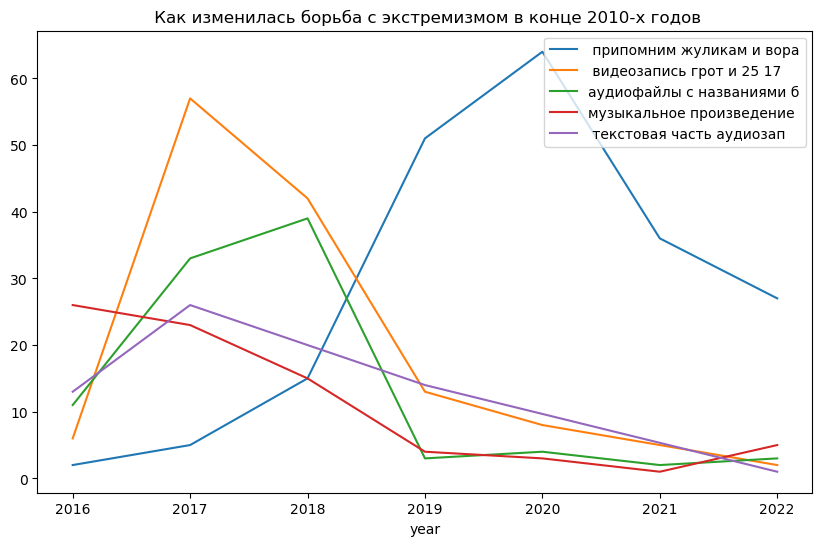

In [11]:
plot_materials(top_mats, " Как изменилась борьба с экстремизмом в конце 2010-х годов")

In [55]:
df.groupby(["predicted_material", "year"]) \
    .size() \
    .unstack(level=0)[top_mats] \
    .fillna(0) \
    .to_csv("viz_data/Как изменилась борьба с экстремизмом.csv")

### Топ регионов по 20.29 КоАП

In [12]:
df.groupby("case_doc_subject_rf", as_index=False).size().sort_values(
    by="size", ascending=False
).iloc[:20]

,case_doc_subject_rf,size
9,Воронежская область,456
37,Омская область,412
25,Краснодарский край,367
0,Алтайский край,359
41,Пермский край,322
22,Кемеровская область - Кузбасс,236
78,Ханты-Мансийский автономный округ - Югра (Тюменская область),230
76,Ульяновская область,223
64,Самарская область,222
14,Ивановская область,219


In [59]:
df.groupby("case_doc_subject_rf", as_index=False).size().sort_values(
    by="size", ascending=False
).to_csv("viz_data/топ регионов.csv", index=False)

In [57]:
# регионы с наименьшим числом приговоров по 20.29

df.groupby("case_doc_subject_rf", as_index=False).size().sort_values(
    by="size", ascending=False
).iloc[-10:]

,case_doc_subject_rf,size
19,Камчатский край,13
21,Кемеровская область,9
49,Республика Ингушетия,6
82,Чукотский автономный округ,3
29,Ленинградская область,3
60,Республика Тыва,2
31,Магаданская область,2
11,Еврейская автономная область,1
12,За пределами территории РФ,1
58,Республика Татарстан,1


### Тимур Муцураев. Точное кол-во упоминаний в актах

In [13]:
# упоминание в приговорах по годам

df[df.acts.str.contains("муцураев", na=False, case=False)].groupby("year").size()

year
2016     77
2017    106
2018    137
2019     67
2020     67
2021     14
2022      7
dtype: int64

In [14]:
# упоминание в приговорах за все годы

df[df.acts.str.contains("муцураев", na=False, case=False)].groupby("year").size().sum()

475

In [15]:
# упоминание в приговорах по регионам

df[df.acts.str.contains("муцураев", na=False, case=False)].groupby(
    "case_doc_subject_rf"
).size().sort_values(ascending=False).head(10)

case_doc_subject_rf
Чеченская Республика                                            48
Омская область                                                  47
Республика Северная Осетия-Алания                               35
Республика Дагестан                                             28
Ульяновская область                                             22
Карачаево-Черкесская Республика                                 20
Ямало-Ненецкий автономный округ                                 18
Краснодарский край                                              18
Воронежская область                                             18
Ханты-Мансийский автономный округ - Югра (Тюменская область)    16
dtype: int64

### Группа Грот

In [48]:
# упоминание в приговорах по годам

df[df.acts.str.contains("грот", na=False, case=False)].groupby("year").size()

year
2016     32
2017    122
2018    110
2019     24
2020     12
2021      9
2022     10
dtype: int64

In [16]:
# упоминание в приговорах за все годы

df[df.acts.str.contains("грот", na=False, case=False)].groupby("year").size().sum()

319

In [49]:
# упоминание в приговорах по регионам за все годы

df[df.acts.str.contains("грот", na=False, case=False)].groupby(
    "case_doc_subject_rf"
).size().sort_values(ascending=False).head(10)

case_doc_subject_rf
Краснодарский край               50
Амурская область                 40
Омская область                   33
Воронежская область              30
Кемеровская область - Кузбасс    17
Волгоградская область            16
Тульская область                 10
Владимирская область              9
Ярославская область               9
Оренбургская область              9
dtype: int64

### Припомним жуликам и ворам

In [50]:
# упоминание в приговорах по годам

df[df.acts.str.contains("припомним жуликам", na=False, case=False)].groupby(
    "year"
).size()

year
2016     2
2017     5
2018    15
2019    52
2020    61
2021    37
2022    30
dtype: int64

In [17]:
# упоминание в приговорах за все годы

df[df.acts.str.contains("припомним жуликам", na=False, case=False)].groupby(
    "year"
).size().sum()

202

In [18]:
# упоминание в приговорах по регионам за все годы

df[df.acts.str.contains("припомним жуликам", na=False, case=False)].groupby(
    "case_doc_subject_rf"
).size().sort_values(ascending=False).head(10)

case_doc_subject_rf
Белгородская область    38
Алтайский край          37
Рязанская область       23
Псковская область       18
Ставропольский край      9
Ивановская область       8
Самарская область        7
Воронежская область      6
Ульяновская область      6
Республика Коми          5
dtype: int64

Топ материал в регионе

In [60]:
grouped = df.groupby(
    ["case_doc_subject_rf", "predicted_material"], as_index=False
).size()

grouped = grouped.replace("None", np.nan)
grouped = grouped.dropna()

idx = grouped.groupby("case_doc_subject_rf")["size"].idxmax()

grouped.loc[idx].head(50)

,case_doc_subject_rf,predicted_material,size
15,Алтайский край,припомним жуликам и ворам их манифест 2002,39
104,Амурская область,аудиофайлы с названиями банда москвы виват россии mp 3 и грот дым mp3 url адрес социальная сеть в контакте,19
166,Архангельская область,фильм покушение на poccию hq начинающийся со слов осень тысяча девятьсот девяносто девятого года волна кровавых взрывов обрушивается на российские города и заканчивающийся словами легитимность людей которые сегодня правят страной автоматически оказывается под вопросом общей продолжительностью 42 мин 40 сек в интернет по электронным адресам 36610579_162147333 2f943c55a908a3e8c2e0 2fpl_wall_ 36610579,3
188,Астраханская область,книга отведение сомнений,5
202,Белгородская область,припомним жуликам и ворам их манифест 2002,37
265,Брянская область,печатное издание книга мертвая вода концепция общественной безопасности китеж державный град россии 2004 в двух частях часть 1 историко философский очерк 457 стр и часть 2 вписание 458 с,2
313,Владимирская область,музыкальное произведение радикальный голос группы коловрат,5
335,Волгоградская область,31 песня спустилась тьма безмолвие в горах,4
420,Вологодская область,аудиофайл под названием дюшес я рисую белым мелом 14 88,3
528,Воронежская область,музыкальное произведение радикальный голос группы коловрат,18


In [61]:
grouped.to_csv("viz_data/топ материал в регионе.csv", index=False)

Как пополнялся реестр экстр. материалов

In [62]:
reestr = pd.read_csv(
    "/Users/kirillkruglikov/repos/investigation-team-rfe/extr_materials/data/exportfsm.csv",
    sep=";",
    index_col=0,
)
reestr.columns = ["material", "date"]

reestr_without_dates = reestr[reestr["date"].isna()].copy()
reestr_without_dates["reg_dates"] = (
    reestr_without_dates["material"].str[-30:].str.extract(r"(\d{2}\W\d{2}\W\d{4})")
)
reestr["date"] = reestr["date"].fillna(reestr_without_dates["reg_dates"])
reestr.date = pd.to_datetime(reestr.date, format="%d.%m.%Y", errors="coerce")
reestr_viz = reestr[reestr["date"].dt.year >= 2007]
reestr_viz = reestr_viz.groupby(reestr_viz.date.dt.year).size()

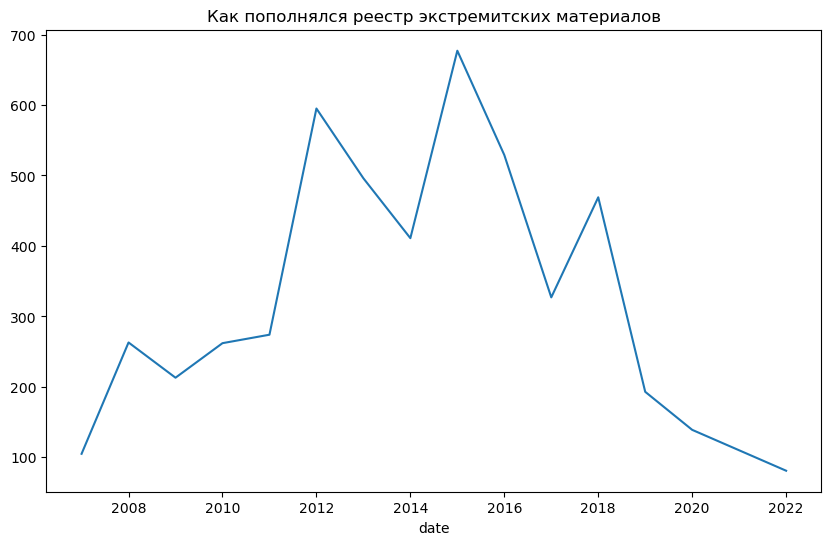

In [63]:
plt.figure(figsize=(10, 6))
reestr_viz.plot()
plt.title("Как пополнялся реестр экстремитских материалов");

In [65]:
reestr_viz.to_csv("viz_data/как пополнялся реестр.csv")

### Данные Верховного суда

In [71]:
df_supreme_court = pd.read_csv(
    "/Users/kirillkruglikov/repos/investigation-team-rfe/extr_materials/new_data/20.29-supreme-court-(edited).csv",
    sep=";"
)
df_supreme_court

,год,Дел поступило в суды,рассмотрено судами дел (по лицам),возвращено для устранения недостатков протоколов,дел прекращено,Наказаний всего,юридические,должностные,предприниматели без ЮЛ,физические наказания,предупреждение (письменное),штраф,арест,приостановление деятельности,конфискация,общая сумма наложенных по постановлениям штрафов
0,2011,95,96,13,18,60,1,13,2.0,44,NaN,60,NaN,NaN,18,140000
1,2012,226,217,28,21,152,8,8,3.0,133,NaN,147,3.0,2.0,21,532000
2,2013,545,545,49,46,398,9,21,16.0,352,NaN,392,5.0,1.0,71,991200
3,2014,828,826,76,39,665,17,12,28.0,608,NaN,653,10.0,2.0,112,1486500
4,2015,1404,1399,118,47,1185,13,20,17.0,1135,NaN,1162,23.0,NaN,104,2553500
5,2016,1921,1925,135,70,1679,26,24,12.0,1617,1.0,1631,43.0,4.0,114,4729200
6,2017,2100,2097,153,68,1846,11,11,4.0,1820,NaN,1783,63.0,NaN,127,3880800
7,2018,2270,2268,215,50,1964,5,11,6.0,1942,NaN,1910,52.0,2.0,122,2845501
8,2019,1844,1836,160,48,1591,6,11,11.0,1563,1.0,1556,34.0,NaN,79,2333700
9,2020,2164,2160,216,70,1826,4,11,NaN,1811,NaN,1805,20.0,1.0,59,2359100


In [90]:
df_supreme_court.to_csv("viz_data/верховный суд.csv", index=False)

С 2011 по 2021 год по данным Верховного суда было наложено 12398 штрафов на сумму 23 667 501

In [72]:
df_supreme_court.sum()

год                                                     24198.0
Дел поступило в суды                                    15493.0
рассмотрено судами дел (по лицам)                       15465.0
возвращено для устранения недостатков протоколов         1342.0
дел прекращено                                            524.0
Наказаний всего                                         13192.0
юридические                                               106.0
должностные                                               163.0
предприниматели без ЮЛ                                    105.0
физические наказания                                    12818.0
предупреждение (письменное)                                 3.0
штраф                                                   12898.0
арест                                                     278.0
приостановление деятельности                               13.0
конфискация                                               902.0
общая сумма наложенных по постановлениям

In [73]:
df_supreme_court.groupby("год")[
    "общая сумма наложенных по постановлениям штрафов"
].sum()

год
2011     140000
2012     532000
2013     991200
2014    1486500
2015    2553500
2016    4729200
2017    3880800
2018    2845501
2019    2333700
2020    2359100
2021    1816000
2022     610801
Name: общая сумма наложенных по постановлениям штрафов, dtype: int64

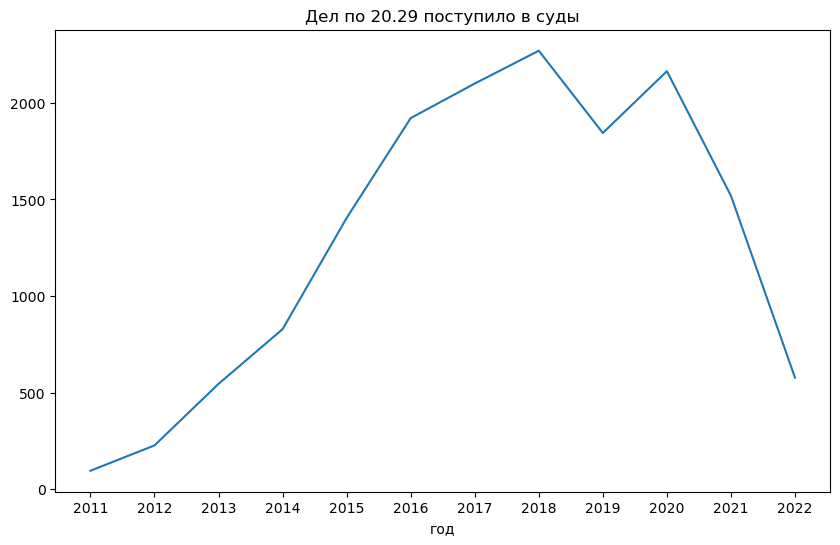

In [74]:
total_cases = df_supreme_court.groupby("год")["Дел поступило в суды"].sum()
plt.figure(figsize=(10, 6))
plt.title("Дел по 20.29 поступило в суды")
total_cases.plot()
plt.xticks(total_cases.index)
plt.show()

In [77]:
total_cases.to_csv("viz_data/Дел по 20.29 поступило в суды.csv")

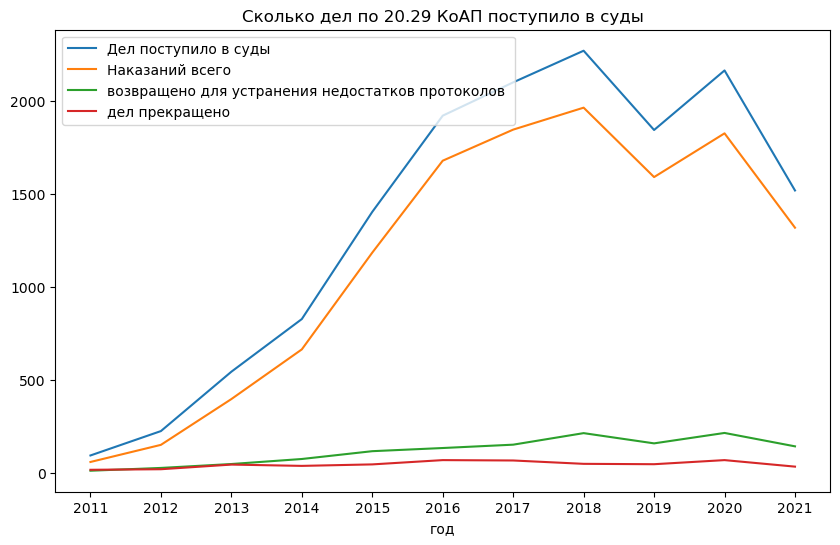

In [51]:
# данные верховного суда
df_supreme_court.groupby("год")[
    [
        "Дел поступило в суды",
        "Наказаний всего",
        "возвращено для устранения недостатков протоколов ",
        "дел прекращено",
    ]
].sum().plot(figsize=(10, 6))
plt.xticks(range(2011, 2022))
plt.title("Сколько дел по 20.29 КоАП поступило в суды");

In [78]:
print(
    "Процент наказаний",
    df_supreme_court["Наказаний всего"].sum()
    / df_supreme_court["рассмотрено судами дел (по лицам)"].sum()
    * 100,
)

Процент наказаний 85.30229550598125


In [79]:
df_supreme_court["Процент прекращённых дел за год"] = (
    df_supreme_court["дел прекращено"]
    / df_supreme_court["рассмотрено судами дел (по лицам)"]
    * 100
)

In [80]:
df_supreme_court["Процент наказаний за год"] = (
    df_supreme_court["Наказаний всего"]
    / df_supreme_court["рассмотрено судами дел (по лицам)"]
    * 100
)

In [81]:
df_supreme_court["Процент возвращённых дел за год"] = (
    df_supreme_court["возвращено для устранения недостатков протоколов "]
    / df_supreme_court["рассмотрено судами дел (по лицам)"]
    * 100
)

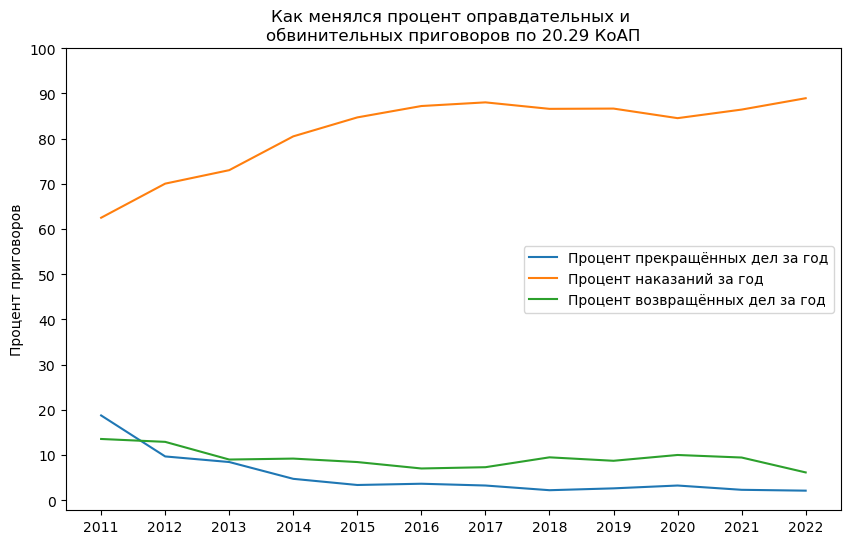

In [108]:
df_supreme_court[
    [
        "Процент прекращённых дел за год",
        "Процент наказаний за год",
        "Процент возвращённых дел за год",
    ]
].plot(figsize=(10, 6))
plt.xticks(labels=range(2011, 2023), ticks=range(0, 12))
plt.yticks(range(0, 101, 10))
plt.ylabel("Процент приговоров")
plt.title(
    "Как менялся процент оправдательных и \nобвинительных приговоров по 20.29 КоАП"
);

### Отрывки из судебных актов

In [86]:
unknown_part = []
for i in tqdm(df.acts):
    pattern = re.findall("(.+не знал.+)", str(i).lower())
    if pattern != []:
        unknown_part.append(pattern)

print(
    f"Около {len(unknown_part)} человек не знали, что материал, который они распространяли является экстремиским"
)

  0%|          | 0/8597 [00:00<?, ?it/s]

Около 2494 человек не знали, что материал, который они распространяли является экстремиским


In [90]:
for i in pd.DataFrame(unknown_part)[0].sample(5).values:
    print(i, "\n")

фио1 в судебном заседании свою вину признал, пояснил, что он не знал, о том, что данные песни фио3 являются экстремистскими. 

    в судебном заседании лицо, в отношении которого ведется производство по делу об административном правонарушении, - фио1 вину в совершении административного правонарушения признал и показал, что, находясь дома, на своей странице в социальной сети «в контакте» в общедоступной форме разместил скачанный им в сети «интернет» аудиофайл под названием «коловрат - слава россии!!!!». его профиль в данной социальной сети был открыт для всех желающих. цели распространения данных материалов у него не было. о том, что данный материал является экстремистским и включен в федеральный список экстремистских материалов, не знал. указанный видеофайл удалил дд.мм.гггг. 

         в судебном заседании хотелов м.б. вину признал в полном объеме, пояснил, что ранее он был имамом ему принесли книгу <данные изъяты> авторы <данные изъяты> и <данные изъяты>, которую он поставил в молель

In [88]:
intent_2 = []
for i in tqdm(df.acts):
    pattern = re.findall("(.+умысла.+)", str(i).lower())
    if pattern != []:
        intent_2.append(pattern)

print(f"Приговоров, в которых у подсудимого не было умысла: {len(intent_2)}")

  0%|          | 0/8597 [00:00<?, ?it/s]

Приговоров, в которых у подсудимого не было умысла: 382


In [89]:
for i in pd.DataFrame(intent_2)[0].sample(3).values:
    print(i, "\n")

в судебном заседании винецкий ф.а. виновным себя в указанном правонарушении признал, с протоколом согласился и пояснил, что разместил у себя на странице в социальной сети «<данные изъяты>» глобальной сети интернет указанное изображение, не имея умысла на распространение экстремистских материалов. он понимает, что указанное изображение, находящееся на его странице в социальной сети «<данные изъяты>» доступна другим пользователям. также пояснил, что в присутствии сотрудников полиции он удалил файл с указанным изображением со своей страницы в социальной сети «<данные изъяты>». 

указанная аудиозапись со страницы «никитин а.» в социальной сети «вконтакте» находилась в свободном доступе и была прослушана пользователями сети «интернет» фио1, проживающим в г. саяногорске, до ее обнаружения 0дата сотрудниками уфсб россии по республике хакасия. факт распространения никитиным а.е. экстремистских материалов задокументирован актом сбора образцов для сравнительного исследования от дата. в ходе пров

In [91]:
guilt_not_accept = []
for i in tqdm(df.acts):
    pattern = re.findall("(.+не признал.+)", str(i).lower())
    if pattern != []:
        guilt_not_accept.append(pattern)

print(f'Приговоров содержащих "вину не признал": {len(guilt_not_accept)}')

  0%|          | 0/8597 [00:00<?, ?it/s]

IOStream.flush timed out
IOStream.flush timed out


Приговоров содержащих "вину не признал": 407


In [98]:
for i in pd.DataFrame(guilt_not_accept)[0].sample(3).values:
    print(i, "\n")

в судебном заседании г. частично согласился с протоколом об административном правонарушении, подтвердив, что он действительно разместил на своей странице в социальной сети «в контакте» видеозапись * однако вину в совершении административного правонарушения, предусмотренного ст. 20.29 коап рф, не признал, пояснив, что он не знал о том, что данный материал будет признан экстремистским, умысла на разжигание социальной розни и вражды не имел. в настоящее время видеозапись им со своей страницы удалена. 

сиверин и.а. в судебном заседании виновным себя не признал, пояснив, что указанные в постановлении о возбуждении дела об административном правонарушении аудиоматериалы были размещены на его странице в социальной сети «вконтакте» до признания их экстремистскими, данная страница закрыта. 

в судебном заседании журавский а.а. факт совершения административного правонарушения не признал, пояснил, что видеозапись была размещена в 2011 году, он не знал, что она носит экстремистский характер, кроме

In [92]:
guilt_accept = []
for i in tqdm(df.acts):
    pattern = re.findall("(.+вину признал.+)", str(i).lower())
    if pattern != []:
        guilt_accept.append(pattern)

print(f'Приговоров содержащих "вину признал": {len(guilt_accept)}')

  0%|          | 0/8597 [00:00<?, ?it/s]

Приговоров содержащих "вину признал": 1342


In [103]:
for i in pd.DataFrame(guilt_accept)[0].sample(3).values:
    print(i, "\n")

фио 1 в судебном заседании вину признал, с протоколом об административном правонарушении согласился, не оспаривает, что размещал на своей странице в социальной сети «вконтакте» ссылки на сайт www.jw.org, не знал какая именно информация и литература организации «свидетели иеговы» запрещена и относится к экстремистской на территории российской федерации. 

при рассмотрении дела сустин д.а., которому были разъяснены права, предусмотренные ч. 1 ст. 25.1 коап рф, положения ст. 51 конституции рф, отводов в порядке ст. 25.13 коап рф и ходатайств в порядке ст. 24.4 коап рф не заявил, вину признал. он указал, что разместил, указанную песню на своей странице в сети «в контакте», так как она ему понравилась. 

    лицо, в отношении которого ведется производство по делу об административном правонарушении бонка в.а. вину признал в полном объеме. пояснил, что он не придавал значение этому материалу, для чего его опубликовал пояснить не может. своей страничкой в сети интернет он пользовался один год,